# MULTICLASS CLASSIFICATION 



In [1]:
#importing libraries
#__Nothing_to_change_here__

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.fashion_mnist.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_test,Y_test,test_size=0.2)

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Print shape of all 4 variables: X_train,Y_train,X_test, and Y_test
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

     

(8000, 28, 28)
(8000,)
(2000, 28, 28)
(2000,)


In [4]:
#print the unique values in Y_train
print(np.unique(Y_train))



[0 1 2 3 4 5 6 7 8 9]


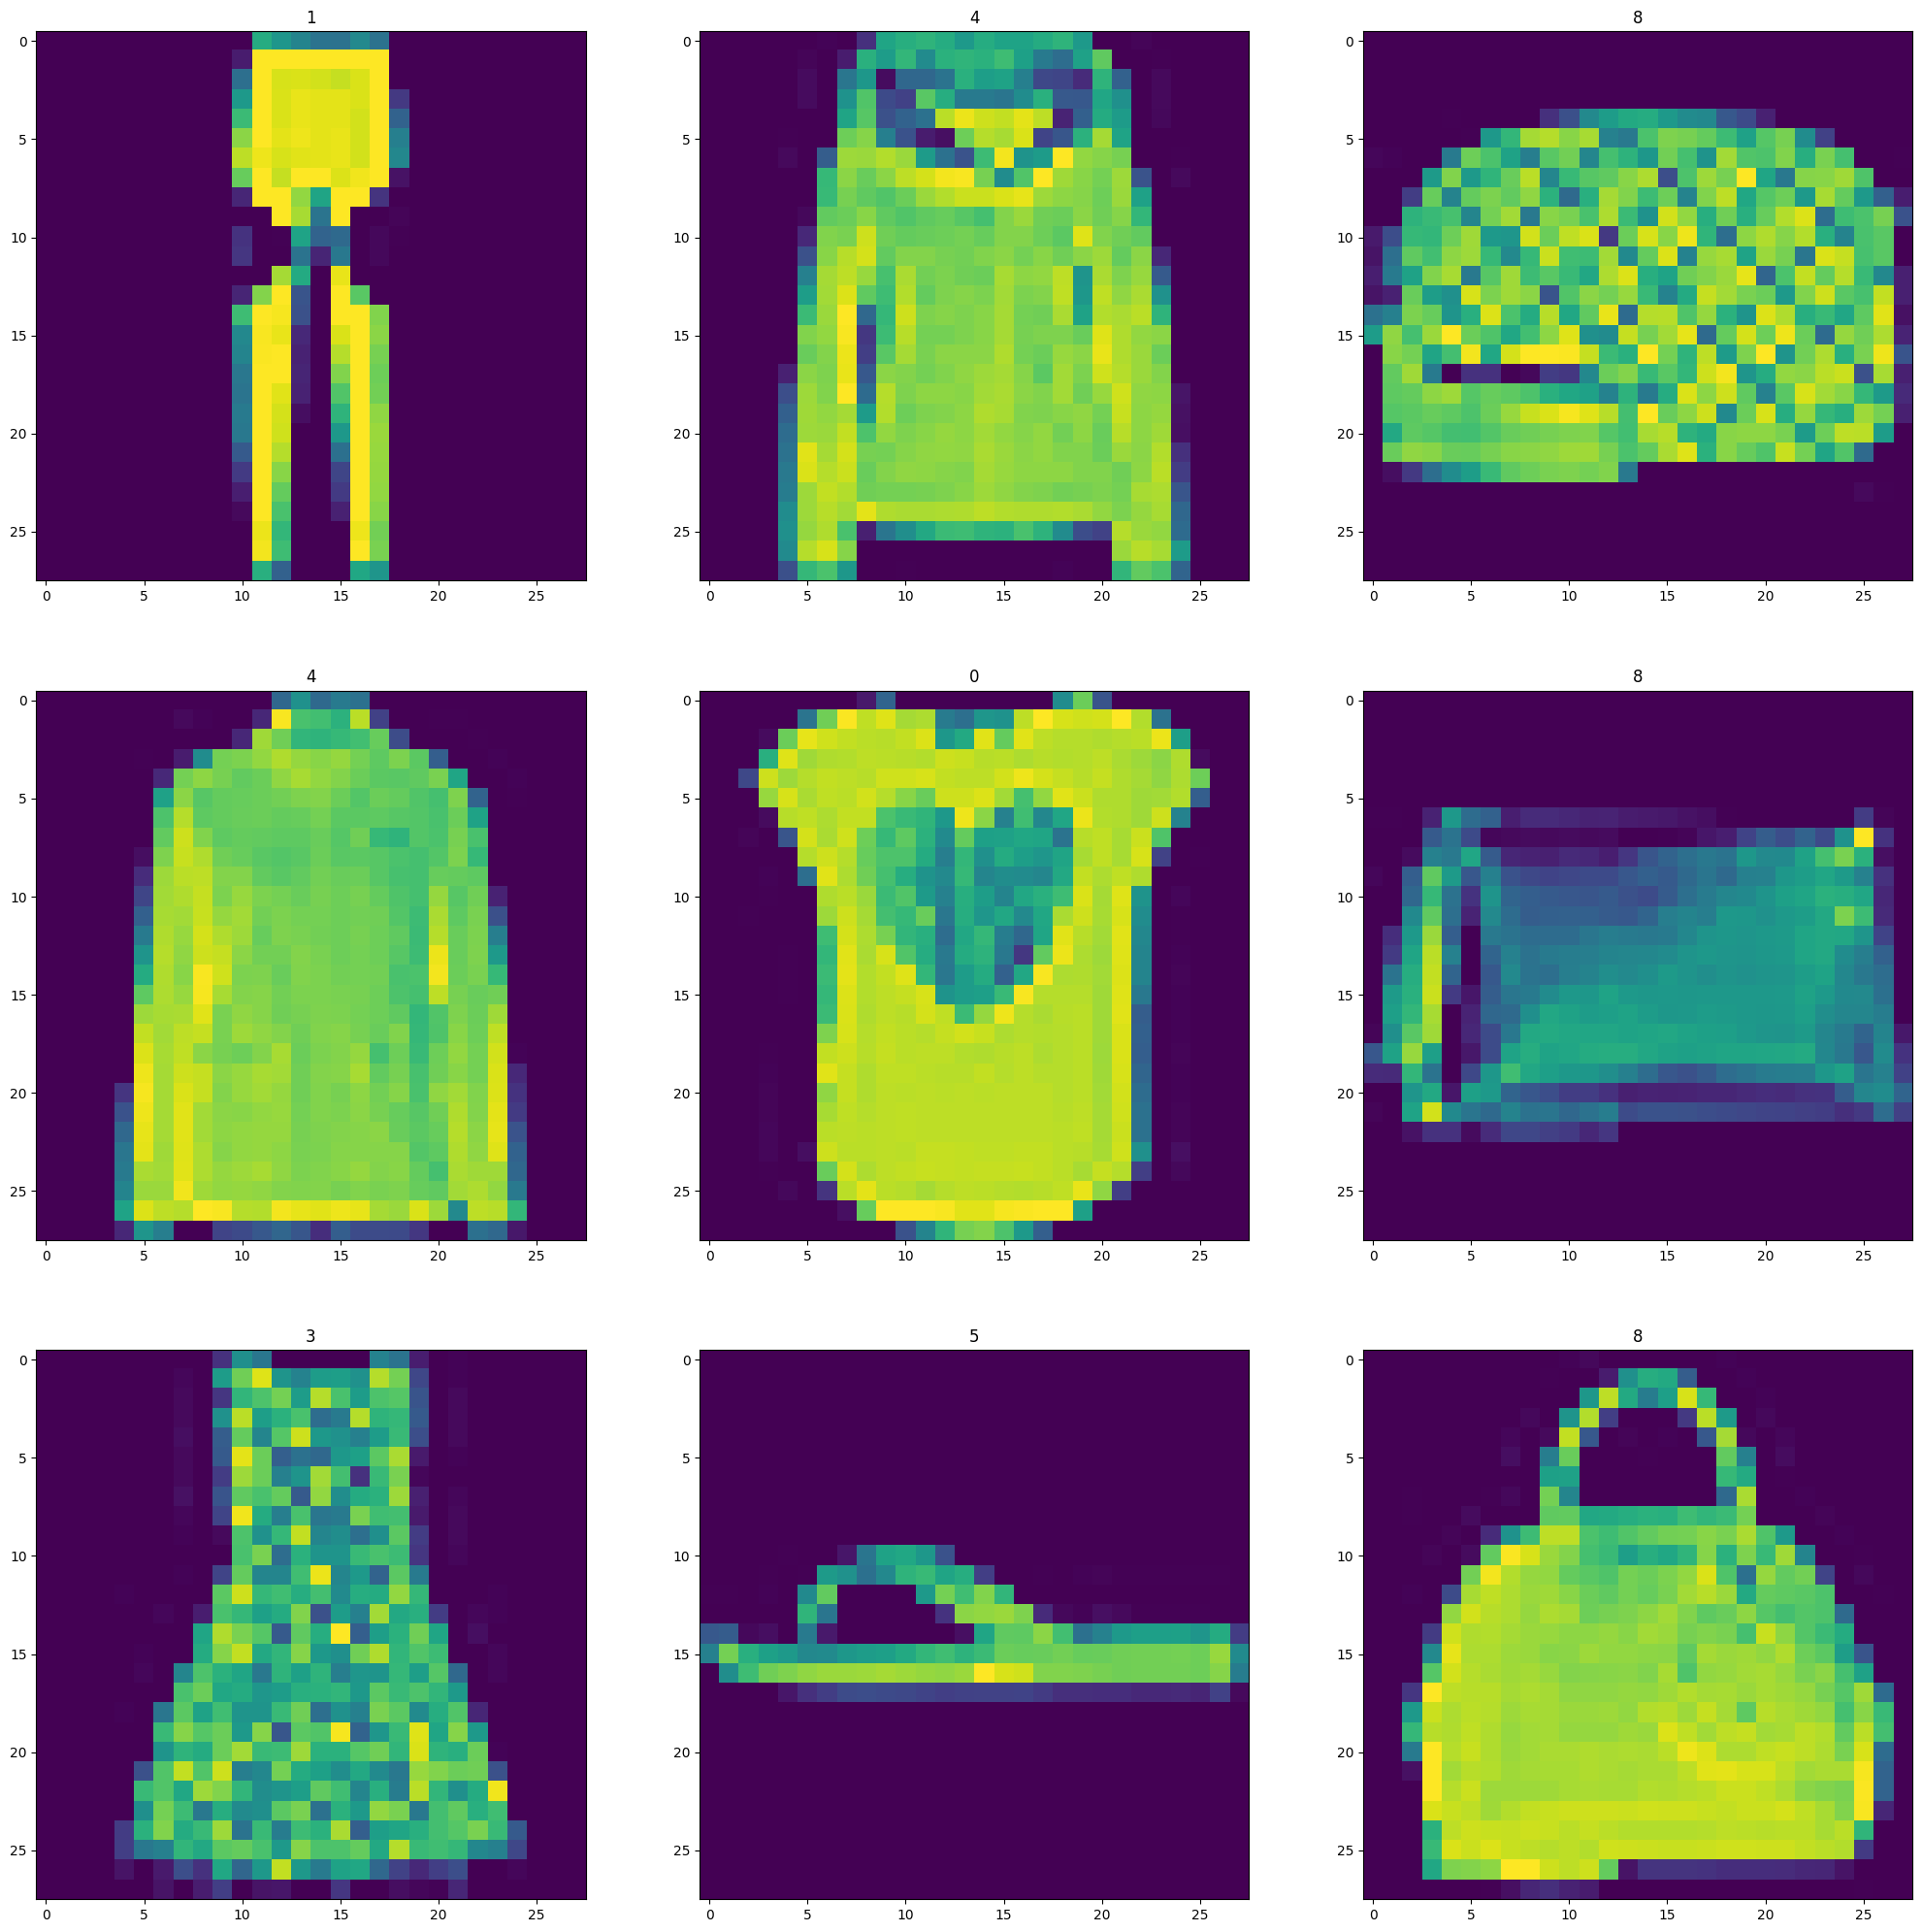

In [7]:
#randomly print 9 images with label
#edit the 2 lines of the code snippet

import random
figure = plt.figure(figsize=(25,25))
for i in range(9):
  index = random.randint(0,len(X_train)-1) # showing the index_th image
  plt.subplot(3,3,i+1)
  #edit1__plot_image_here_
  plt.imshow(X_train[index])
  #edit2__add_label_here_
  plt.title(Y_train[index])
  


###These number denotes the respective object
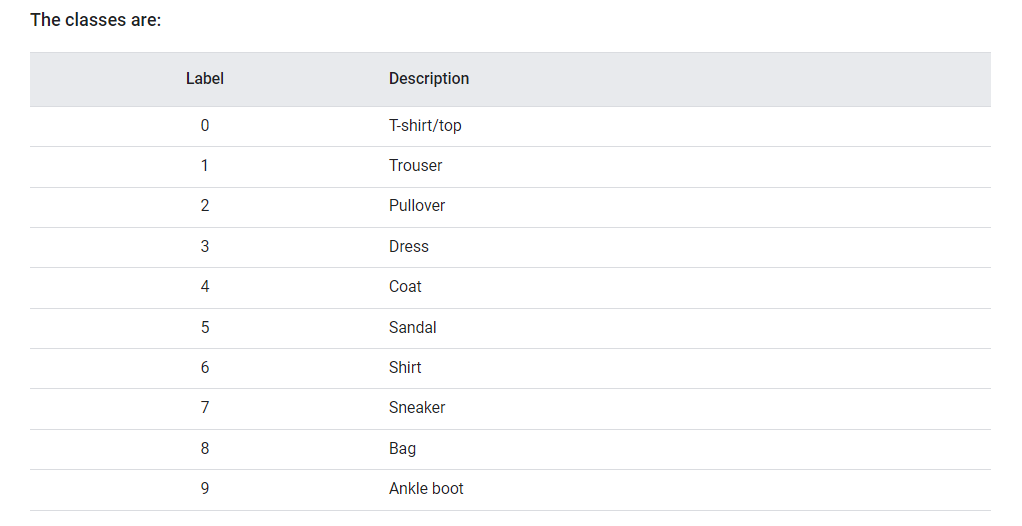

In [8]:
# Find the count of each type of class
import pandas as pd
count = pd.Series(Y_train).value_counts()
print(count)

2    812
7    804
1    802
9    802
5    801
3    800
0    798
4    797
6    794
8    790
dtype: int64


In [9]:
# model initialization
model = tf.keras.Sequential()

# adding the 1st and 2nd layer layer 
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))


#__add__ additional Intermediate Dense layers here to create the output
model.add(tf.keras.layers.Dense(96, activation = 'relu'))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(32,activation="relu"))
model.add(tf.keras.layers.Dense(16,activation="relu"))

#__output__layer with correct output shape and activation function[ google if finding this difficult to get]
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [10]:
# Compiling the model
#add the lr and loss in the given space

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate =0.001),
                  loss ="sparse_categorical_crossentropy",
                  metrics=['accuracy'])

In [11]:
#Lets analyse the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 96)                12384     
                                                                 
 dense_2 (Dense)             (None, 64)                6208      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 10)                1

###What is the number of trainable parameters in the model?

In [12]:
""" 
[objective] Write the answer here: 112,148
"""

' \n[objective] Write the answer here: 112,148\n'

In [13]:
#lets train the model
#pass correct argument at the comment's place

history = model.fit(X_train,Y_train, validation_split=0.2, epochs = 15)

Epoch 1/15
200/200 [==============================] - 2s 4ms/step - loss: 3.0426 - accuracy: 0.3916 - val_loss: 1.3499 - val_accuracy: 0.5844
Epoch 2/15
200/200 [==============================] - 1s 4ms/step - loss: 1.2201 - accuracy: 0.6055 - val_loss: 1.1084 - val_accuracy: 0.6687
Epoch 3/15
200/200 [==============================] - 1s 3ms/step - loss: 1.0241 - accuracy: 0.6700 - val_loss: 0.9759 - val_accuracy: 0.7038
Epoch 4/15
200/200 [==============================] - 1s 3ms/step - loss: 0.9343 - accuracy: 0.6891 - val_loss: 0.9339 - val_accuracy: 0.7069
Epoch 5/15
200/200 [==============================] - 1s 3ms/step - loss: 0.8708 - accuracy: 0.7042 - val_loss: 0.8904 - val_accuracy: 0.7156
Epoch 6/15
200/200 [==============================] - 1s 3ms/step - loss: 0.8200 - accuracy: 0.7153 - val_loss: 0.8716 - val_accuracy: 0.7250
Epoch 7/15
200/200 [==============================] - 1s 5ms/step - loss: 0.7939 - accuracy: 0.7216 - val_loss: 0.8702 - val_accuracy: 0.7063
Epoch 

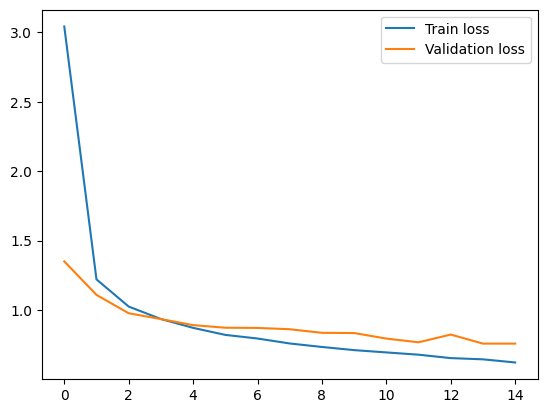

In [14]:
#lets plot the losses

plt.plot(history.history['loss'],label="Train loss")
plt.plot(history.history['val_loss'], label = "Validation loss")
plt.legend()
     

###What do you infer from the graph of losses above?

In [17]:
"""
[Under 100 words] Write your answer here: 
 1.initially training loss is greater than validation loss
2.  fall in training loss after initiall epochs
3. large negative slope of training loss than validation loss initially

"""

'\n[Under 100 words] Write your answer here: \n 1.initially training loss is greater than validation loss\n2.  fall in training loss after initiall epochs\n3. large negative slope of training loss than validation loss initially\n\n'

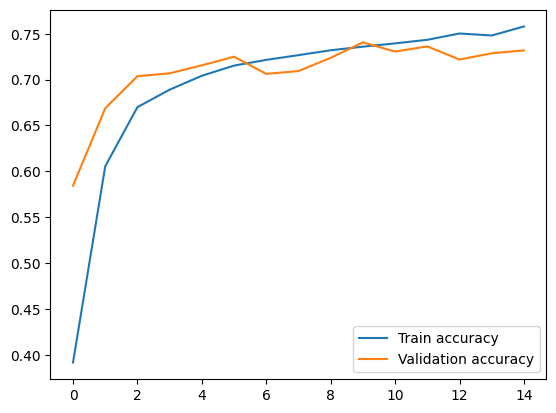

In [16]:
#plotting the accuracy of the traing

plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

###What do you infer from the graph of accuracies above?

In [18]:
"""
[Under 100 words] Write your answer here:
The plots show noticeable sudden changes in validation accuracy, particularly with sharp angles. The steep upward trend of the learning rate during the early epochs suggests rapid learning at the beginning. The training accuracy consistently improves over time, whereas the validation accuracy experiences intermittent fluctuations. These irregularities could indicate that the model is memorizing the data, implying overfitting. Additionally, there exists a significant disparity between the validation accuracy and the training accuracy.
"""

'\n[Under 100 words] Write your answer here:\nThe plots show noticeable sudden changes in validation accuracy, particularly with sharp angles. The steep upward trend of the learning rate during the early epochs suggests rapid learning at the beginning. The training accuracy consistently improves over time, whereas the validation accuracy experiences intermittent fluctuations. These irregularities could indicate that the model is memorizing the data, implying overfitting. Additionally, there exists a significant disparity between the validation accuracy and the training accuracy.\n'

In [19]:
#Checking the prediction

Y_predicted = model.predict(X_test)
Y_pred = np.argmax(Y_predicted , axis = 1)

63/63 [==============================] - 0s 2ms/step


In [20]:
# Calculate the R2score for the test data

from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)
     

0.6155826105368825

In [21]:
# Let's see the kernel(weights) of the layers
model.layers[1].kernel.shape

TensorShape([784, 128])

In [22]:
# print the shape of kernel of other layers as well
print(model.layers[2].kernel.shape)
print(model.layers[3].kernel.shape)
print(model.layers[4].kernel.shape)


(128, 96)
(96, 64)
(64, 32)


In [26]:
# Does that satisfied the matrix multiplication math discussed earlier




It is clear that each kernel has a shape of m x n, where m denotes the number of neurons in the previous layer and n represents the number of neurons in the subsequent layer. This configuration allows for the multiplication of the 1 x m activation row from the previous layer with the mxn kernel matrix. Consequently, we obtain 1 x n outputs that are then combined with a bias term to generate n activations for the output layer.

SyntaxError: ignored